# Decision Trees

In [2]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image, display
import pandas as pd
import pydotplus
import numpy as np
from sklearn.tree import plot_tree


[Text(111.60000000000001, 195.696, 'X[2] <= 0.149\ngini = 0.62\nsamples = 10\nvalue = [2, 3, 5]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(167.4, 152.208, 'X[0] <= -0.896\ngini = 0.611\nsamples = 6\nvalue = [2, 3, 1]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 108.72, 'X[3] <= 0.356\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(167.4, 65.232, 'X[3] <= -0.503\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]')]

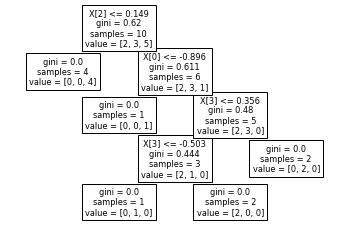

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
np.random.seed(0)
X = np.random.randn(10, 4)
y = np.array(["foo", "bar", "baz"])[np.random.randint(0, 3, 10)]
clf = DecisionTreeClassifier(random_state=42).fit(X, y)
export_graphviz(clf)
plot_tree(clf)

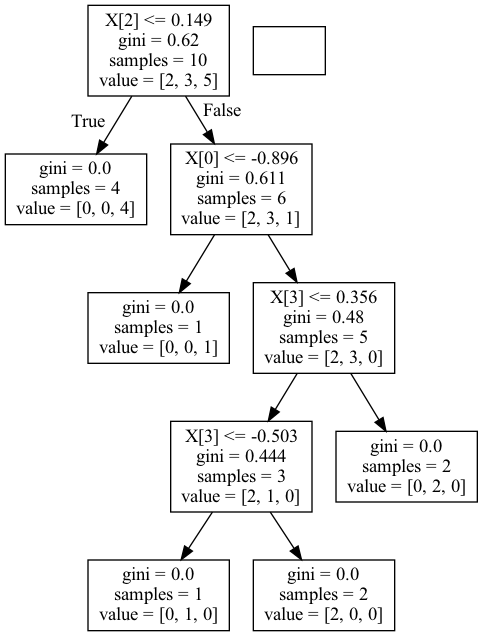

In [5]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [4]:
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

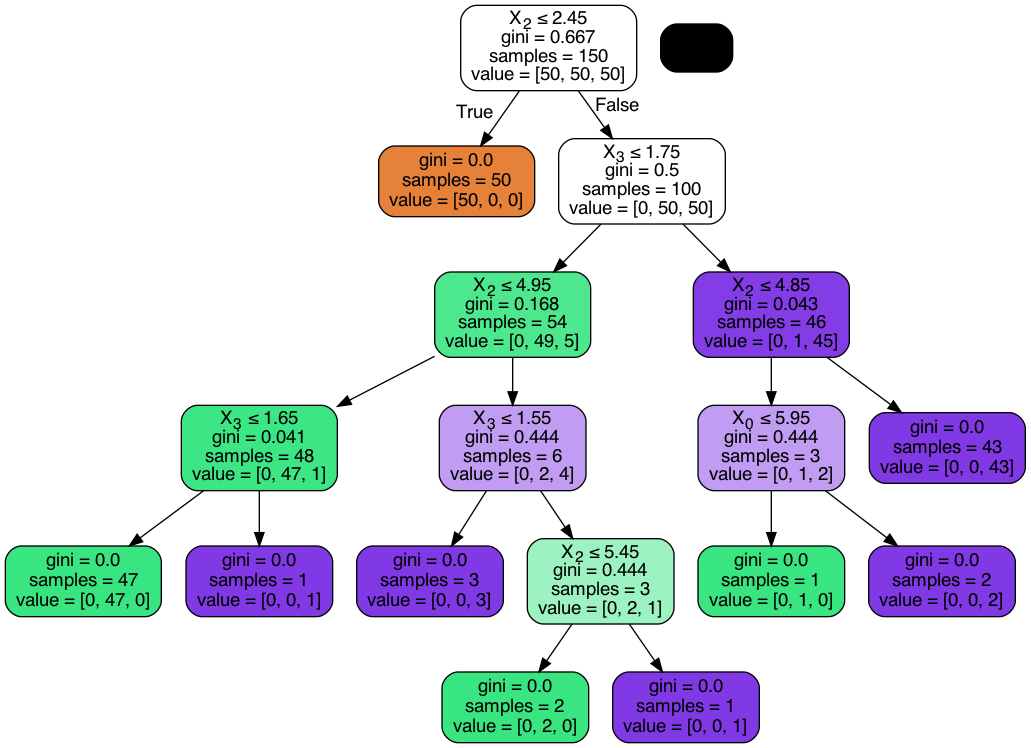

In [12]:
import sklearn.datasets as datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(df, y)

jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)

# 2d iris demo

In [13]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


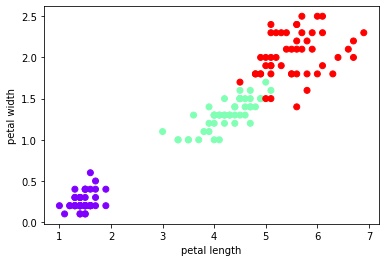

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=y, cmap = 'rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width');

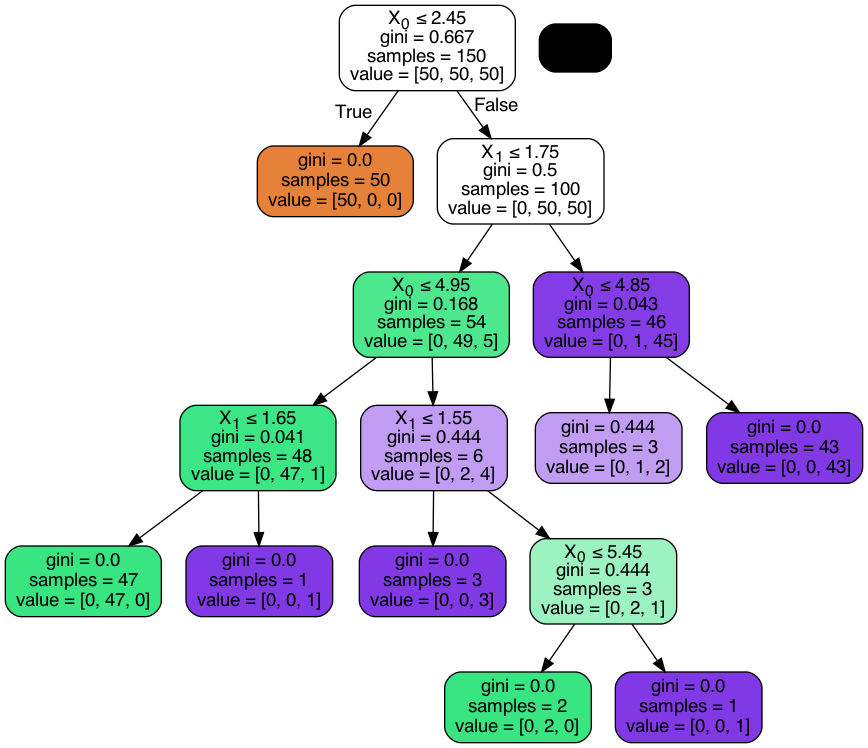

In [10]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(df, y)

jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)

# Gini Impurity

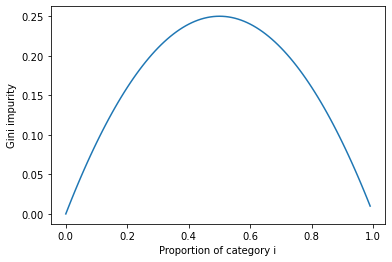

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
p_i = np.arange(0,1,0.01)
gini = p_i*(1- p_i)
plt.plot(p_i, gini); plt.ylabel("Gini impurity"); plt.xlabel("Proportion of category i");plt.savefig("gini.png");

# Car Decision Tree

In [71]:

cols = ["Car Make" , "Type" , "Colour" , "Price" , "Mileage" , "Bought?"]
data = [["VW" , "Polo" , "Grey" , 2000 , 82000 , True],
        ["Ford" , "Fiesta" , "Purple" , 1795 , 95000 , True],
        ["Ford" , "Fiesta" , "Grey" , 1990 , 90000 , False],
        ["VW" , "Golf" , "Red" , 1800 , 120000 , True],
        ["VW" , "Polo" , "Grey" , 900 , 150000 , False], 
        ["Ford" , "Ka" , "Yellow" , 1400 , 100000 , True]]
data_df = pd.DataFrame(data, columns = cols)
data_df

,Car Make,Type,Colour,Price,Mileage,Bought?
0,VW,Polo,Grey,2000,82000,True
1,Ford,Fiesta,Purple,1795,95000,True
2,Ford,Fiesta,Grey,1990,90000,False
3,VW,Golf,Red,1800,120000,True
4,VW,Polo,Grey,900,150000,False
5,Ford,Ka,Yellow,1400,100000,True


scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.


In [72]:
df = data_df[["Car Make" , "Type" , "Colour" , "Price" , "Mileage"]]
make = pd.get_dummies(df["Car Make"])
model = pd.get_dummies(df["Type"])
col= pd.get_dummies(df["Colour"])
df = pd.concat([make, model, col, df["Price"], df["Mileage"]], axis=1)
y = data_df["Bought?"]
df

,Ford,VW,Fiesta,Golf,Ka,Polo,Grey,Purple,Red,Yellow,Price,Mileage
0,0,1,0,0,0,1,1,0,0,0,2000,82000
1,1,0,1,0,0,0,0,1,0,0,1795,95000
2,1,0,1,0,0,0,1,0,0,0,1990,90000
3,0,1,0,1,0,0,0,0,1,0,1800,120000
4,0,1,0,0,0,1,1,0,0,0,900,150000
5,1,0,0,0,1,0,0,0,0,1,1400,100000


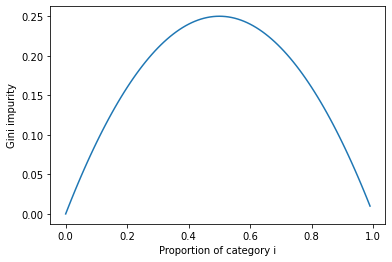

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
p_i = np.arange(0,1,0.01)
gini = p_i*(1- p_i)
plt.plot(p_i, gini); plt.ylabel("Gini impurity"); plt.xlabel("Proportion of category i");plt.savefig("gini.png");

In [7]:
def gini(S):
    if len(S) == 1:
        return 0
    if S.count(S[0]) == len(S) and S:
        return 0
    dums = pd.get_dummies(S)
    n,l = dums.shape
    tot = 0
    for i in range(l):
        p_i = sum(dums[i]/n)
        gi = p_i*(1-p_i)
        tot+= gi
    return tot

print("Gini [1,1,0,0,1] = ", gini([1, 1, 0, 0, 1]))
print("Gini [1,1,0] = ", gini([1, 1, 0]))
print("Gini [1,1,1] = ", gini([1,1,1]))

Gini [1,1,0,0,1] =  0.48
Gini [1,1,0] =  0.4444444444444445
Gini [1,1,1] =  0


In [8]:
def gini_change(start, leaf1,leaf2):
    gini_start = gini(start)
    l_cont = gini(leaf1)*len(leaf1)
    print('from left', gini(leaf1)*len(leaf1)/len(start))
    print('from right', gini(leaf2)*len(leaf2)/len(start))
    gini_end = (gini(leaf1)*len(leaf1)+gini(leaf2)*len(leaf2))/len(start)
    return gini_start - gini_end

#Car make change
gini_change([1,1,1,1,0,0], [1,1,0],[1,1,0])

from left 0.22222222222222224
from right 0.22222222222222224


0.0

In [76]:
# golf vs not golf
gini_change([1,1,1,1,0,0], [1],[1,1,0,1,0])

from left 0.0
from right 0.39999999999999997


0.04444444444444451

In [77]:
# colour grey or not grey
gini_change([1,1,1,1,0,0], [1,0,0],[1,1,1])

from left 0.22222222222222224
from right 0.0


0.22222222222222224

In [78]:
# price above or below 1000
gini_change([1,1,1,1,0,0], [1,1,0,1,1],[0])

from left 0.26666666666666666
from right 0.0


0.1777777777777778

In [79]:
# second split: is VW?
gini_change([1,1,0], [1,0],[0])

from left 0.3333333333333333
from right 0.0


0.11111111111111116

In [80]:
# second split: price below £2000
gini_change([1,1,0], [0,0],[1])

from left 0.0
from right 0.0


0.4444444444444445

In [81]:
# second split: mileage below 86000
gini_change([1,1,0], [0,0],[1])

from left 0.0
from right 0.0


0.4444444444444445

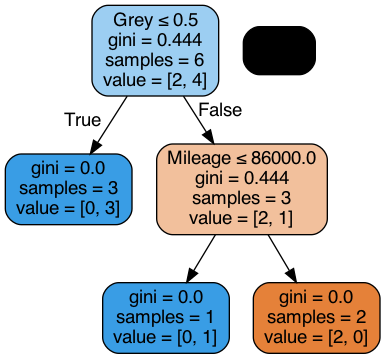

In [85]:
dtree = DecisionTreeClassifier()
dtree.fit(df, y)
jupyter_graphviz(dtree, filled=True, feature_names=df.columns, rounded=True, special_characters=True)

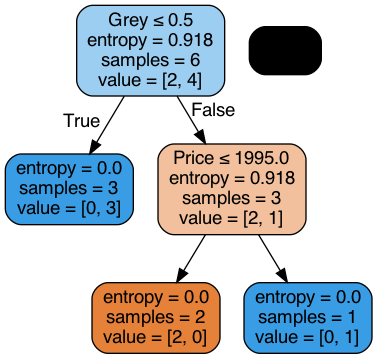

In [83]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(df, y)
jupyter_graphviz(dtree, filled=True, feature_names=df.columns, rounded=True, special_characters=True)

# Demo with 3 classes

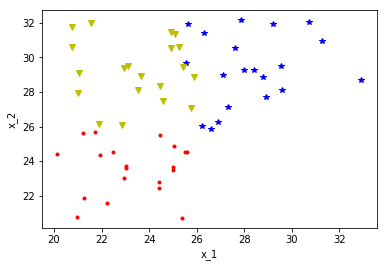

In [11]:
n = 20
np.random.seed(2000)
x1 = (np.random.rand(n, 2)*8)+25
x2 = (np.random.rand(n,2)*6) +20
x3 = (np.random.rand(n, 2)*6)+[20,26]
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");

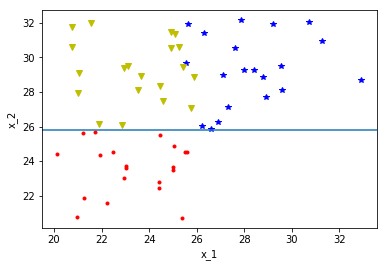

In [12]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79); plt.savefig("overfit_1.png");

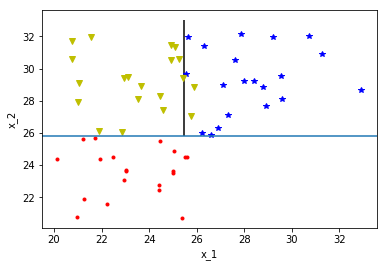

In [13]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33);plt.savefig("overfit_2.png");

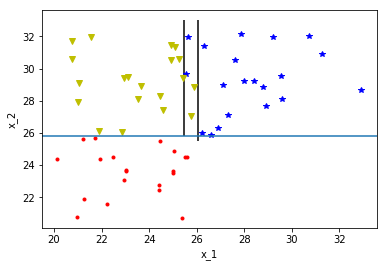

In [14]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33)
plt.vlines(26.05, ymin=25.48, ymax = 33);plt.savefig("overfit_3.png");

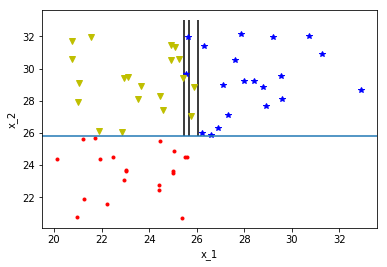

In [15]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33)
plt.vlines(26.05, ymin=25.79, ymax = 33)
plt.vlines(25.7, ymin=25.79, ymax = 33);plt.savefig("overfit_4.png");

# Decision Tree for 3 classes

In [27]:
# turn data in to training data
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2]); X3 = np.array([(x[0],x[1],2) for x in x3])
X = np.concatenate([X1, X2, X3])
X_data = pd.DataFrame(X[:,:2])
y_data = pd.DataFrame(X[:,2], dtype=int)

In [28]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_data, y_data);

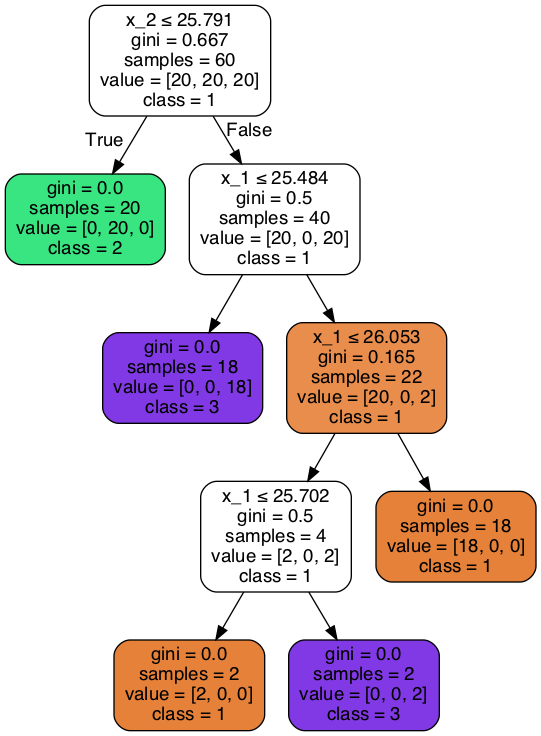

In [29]:
jupyter_graphviz(dtree, filled=True, feature_names=["x_1", "x_2"], class_names=["1", "2", "3"], rounded=True, special_characters=True)

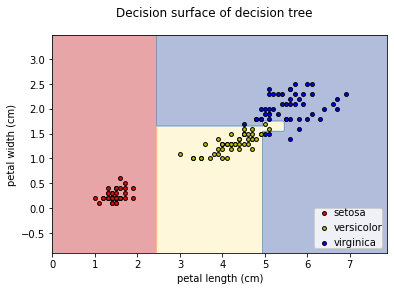

In [68]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# We only take two features
X = iris.data[:, (2,3)]
y = iris.target

# Train
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.suptitle("Decision surface of decision tree")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [32]:
dtree = DecisionTreeClassifier(random_state=42, criterion="entropy")
dtree.fit(X_data, y_data);

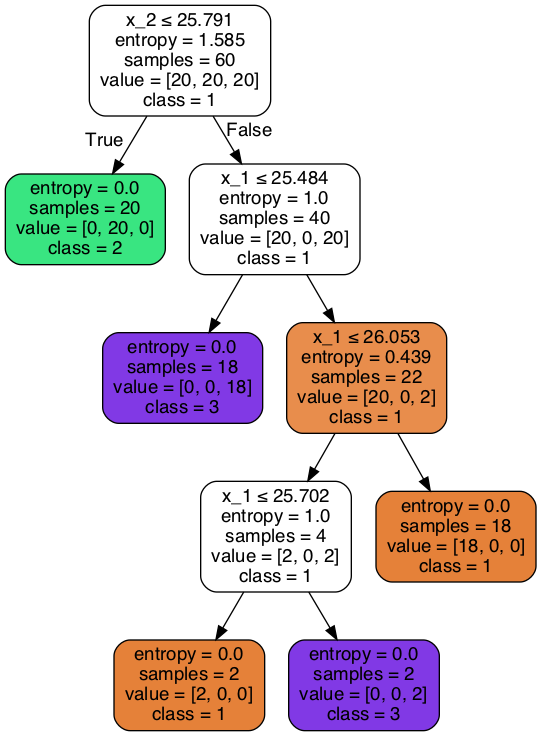

In [31]:
jupyter_graphviz(dtree, filled=True, feature_names=["x_1", "x_2"], class_names=["1", "2", "3"], rounded=True, special_characters=True)

In [69]:
def entropy(S):
    dums = pd.get_dummies(S)
    n, l = dums.shape
    tot = 0
    for i in range(l):
        p_i = sum(dums[i])/n
        ent = p_i * np.log2(p_i)
        tot += ent
    return -tot




# Entropy

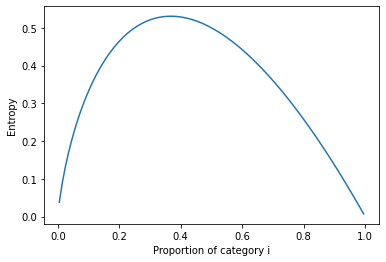

In [42]:
p_i = np.arange(0.005,1,0.01)
ent = -p_i*np.log2(p_i)
plt.plot(p_i, ent); plt.ylabel("Entropy"); plt.xlabel("Proportion of category i");plt.savefig("entropy.png");